In [ ]:
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 56.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.
geopandas 1.1.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
pymc 5.25.1 requires numpy>=1.25.0, but you h

In [ ]:
import pandas as pd

file_path = "./dataset_DACN - 2024-2022 (1).csv"
df_ = pd.read_csv(file_path, encoding='utf-8')

"""
Xóa các record có giá trị NAN
Xử lý số thực
Xử lý các biến định tính sử dụng trong tính toán WQI (Edwwardsiella ictaluri, Aeromonas hydrophila)
"""
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = df_.replace({'NaN':np.nan,'NAN':np.nan, 'nan':np.nan, None: np.nan, "":np.nan, "-":np.nan})
df = df.dropna()
# Correct floating point
df['Nhiệt độ'] = df['Nhiệt độ'].replace(",",".", regex=True)
df['pH'] = df['pH'].replace(",",".",regex=True)
df['DO'] = df['DO'].replace(",",".", regex=True)
df['Độ dẫn'] = df['Độ dẫn'].replace(",",".", regex=True)
df['Độ kiềm'] = df['Độ kiềm'].replace(",",".", regex=True)
df['N-NO2'] = df['N-NO2'].replace(",",".", regex=True)
df['N-NH4'] = df['N-NH4'].replace(",",".", regex=True)
df['P-PO4'] = df['P-PO4'].replace(",",".", regex=True)
df['H2S'] = df['H2S'].replace(",",".", regex=True)
df['TSS'] = df['TSS'].replace(",",".", regex=True)
df['COD'] = df['COD'].replace(",",".", regex=True)
df['Aeromonas tổng số'] = df['Aeromonas tổng số'].replace(",","", regex=True)
df['Aeromonas tổng số'] = df['Aeromonas tổng số'].replace({"<1":1, "< 1":1})
df['Coliform'] = df['Coliform'].replace(",","", regex=True).replace("<1",1)
df['WQI'] = df['WQI'].replace(",",".", regex=True)
df['Edwardsiella ictaluri'] =df['Edwardsiella ictaluri'].replace({'Dương tính': 1, 'Âm tính': 0,'Dươ\n ng tính':1,'Dương\n tính':1, 'Dươ ng\n tính':1,'Dươ ng tính':1})
df['Aeromonas hydrophila'] = df['Aeromonas hydrophila'].replace({'Dương tính': 1, 'Âm tính': 0})

df = df.reset_index(drop=True)

/tmp/ipython-input-841407132.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Edwardsiella ictaluri'] =df['Edwardsiella ictaluri'].replace({'Dương tính': 1, 'Âm tính': 0,'Dươ\n ng tính':1,'Dương\n tính':1, 'Dươ ng\n tính':1,'Dươ ng tính':1})
/tmp/ipython-input-841407132.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Aeromonas hydrophila'] = df['Aeromonas hydrophila'].replace({'Dương tính': 1, 'Âm tính': 0})


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 82.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.2 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but 

In [ ]:
"""
CatBoost Regressor
"""
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Xác định các biến phân loại
cat_columns = ['Edwardsiella ictaluri','Aeromonas hydrophila']

# Chuyển đổi biến phân loại sang kiểu category
for col in cat_columns:
    df[col] = df[col].astype("category")

# Chia dữ liệu train/test (80% train, 20% test)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Chọn các feature và label
x_features = ['Nhiệt độ', 'DO','Độ dẫn','Độ kiềm','N-NO2','N-NH4','P-PO4','H2S','TSS','COD','Aeromonas tổng số', 'Edwardsiella ictaluri','Aeromonas hydrophila', 'Coliform']
x_features_except_pH = ['Nhiệt độ', 'DO','Độ dẫn','Độ kiềm','N-NO2','N-NH4','P-PO4','H2S','TSS','COD','Aeromonas tổng số', 'Edwardsiella ictaluri','Aeromonas hydrophila', 'Coliform']
f_except_umImp = ['DO','Độ dẫn','N-NH4','P-PO4','TSS','COD','Aeromonas tổng số']
f_except = ['Nhiệt độ', 'DO','Độ dẫn','Độ kiềm','N-NO2','N-NH4','H2S','TSS','COD','Aeromonas tổng số', 'Edwardsiella ictaluri','Aeromonas hydrophila']
y_label = 'WQI'

X_train = train_data[x_features]
y_train = train_data[y_label]
X_test = test_data[x_features]
y_test = test_data[y_label]

# Tạo Pool dữ liệu train và test
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_columns)
test_pool = Pool(data=X_test, cat_features=cat_columns)

# Định nghĩa mô hình và tham số
model = CatBoostRegressor(
    loss_function='RMSE',
    iterations=1000,
    depth=4,
    learning_rate=0.1,
    l2_leaf_reg=1,
    boosting_type='Ordered',
    eval_metric='RMSE',
    verbose=50,
    early_stopping_rounds=50
)

# Huấn luyện mô hình
model.fit(train_pool)

# Dự đoán trên tập test
preds = model.predict(test_pool)

# Tính toán các chỉ số đánh giá
mse_value = mean_squared_error(y_test, preds)
mae_value = mean_absolute_error(y_test, preds)
r2_value = r2_score(y_test, preds)
mape = mean_absolute_percentage_error(y_test, preds) * 100

# In kết quả
print(f"MSE: {mse_value}")
print(f"MAE: {mae_value}")
print(f"R²: {r2_value}")
print(f"MAPE: {mape:.2f}%")

0:	learn: 15.0243996	total: 54.8ms	remaining: 54.8s
50:	learn: 2.1464455	total: 499ms	remaining: 9.29s
100:	learn: 1.6436948	total: 987ms	remaining: 8.79s
150:	learn: 1.3870107	total: 1.44s	remaining: 8.1s
200:	learn: 1.2873091	total: 1.9s	remaining: 7.55s
250:	learn: 1.2127451	total: 2.23s	remaining: 6.64s
300:	learn: 1.1574770	total: 2.62s	remaining: 6.07s
350:	learn: 1.0831534	total: 2.86s	remaining: 5.29s
400:	learn: 1.0549789	total: 3.3s	remaining: 4.92s
450:	learn: 1.0409524	total: 3.75s	remaining: 4.56s
500:	learn: 1.0176678	total: 4.21s	remaining: 4.2s
550:	learn: 0.9923797	total: 4.6s	remaining: 3.75s
600:	learn: 0.9664797	total: 5.04s	remaining: 3.35s
650:	learn: 0.9594953	total: 5.39s	remaining: 2.89s
700:	learn: 0.9526913	total: 5.83s	remaining: 2.49s
750:	learn: 0.9436385	total: 6.13s	remaining: 2.03s
800:	learn: 0.9312642	total: 6.49s	remaining: 1.61s
850:	learn: 0.8955218	total: 6.75s	remaining: 1.18s
900:	learn: 0.8634298	total: 7.07s	remaining: 777ms
950:	learn: 0.7978

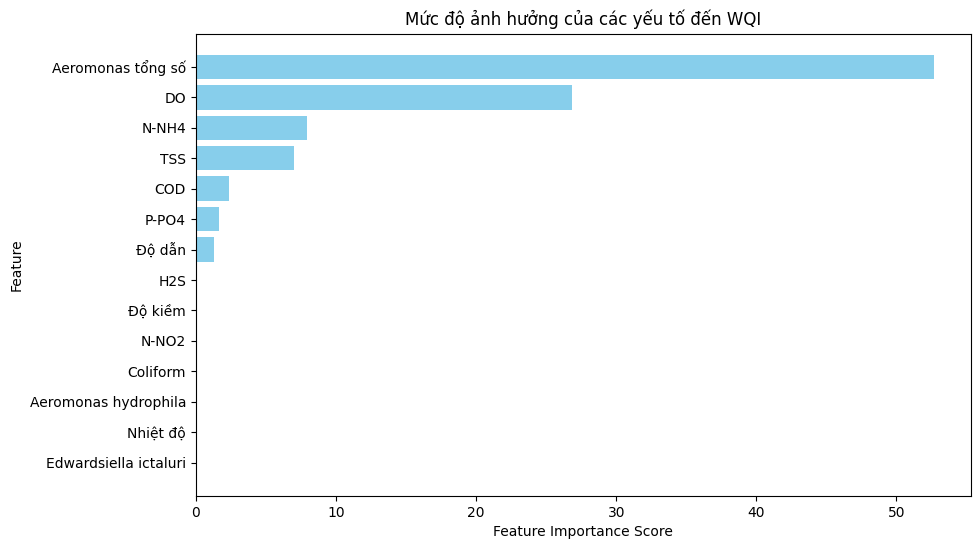

In [ ]:
"""
Độ ảnh hưởng của các features - CatBoost Important Features
"""
import pandas as pd
import matplotlib.pyplot as plt

# Lấy Feature Importance
feature_importance = model.get_feature_importance()
feature_names = X_train.columns

# Hiển thị kết quả dưới dạng DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Mức độ ảnh hưởng của các yếu tố đến WQI")
plt.gca().invert_yaxis()  # Đảo ngược trục để feature quan trọng nhất ở trên cùng
plt.show()

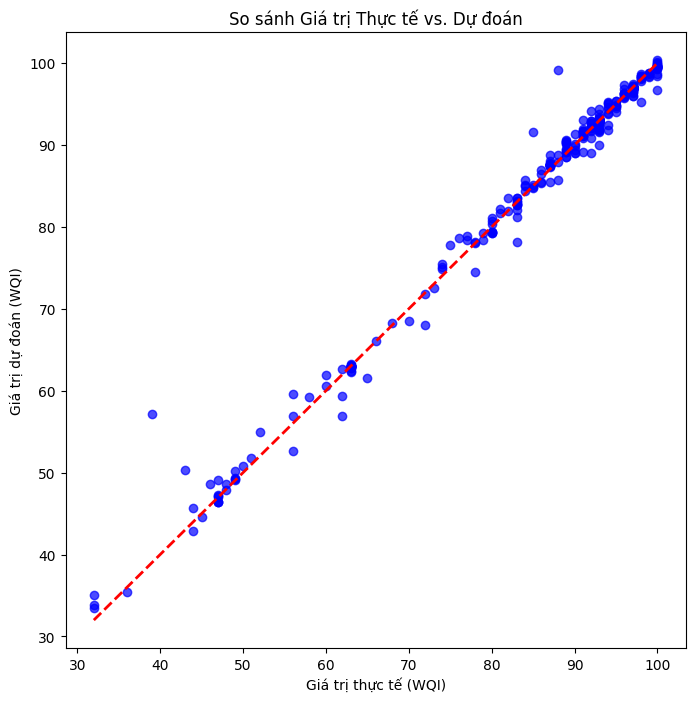

In [ ]:
"""
So sánh giá trị do Model CatBoost dự đoán so với giá trị thực tế từ bộ dữ liệu test
"""
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
plt.scatter(y_test, preds, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Đường y=x
plt.xlabel("Giá trị thực tế (WQI)")
plt.ylabel("Giá trị dự đoán (WQI)")
plt.title("So sánh Giá trị Thực tế vs. Dự đoán")
plt.show()

In [ ]:
"""
Export CatBoost Model to pkl
"""
import joblib

# Export the trained model to a pkl file
joblib.dump(model, 'catboost_model.pkl')

print("CatBoost model exported successfully to catboost_model.pkl")

CatBoost model exported successfully to catboost_model.pkl


In [ ]:
"""
Optimizing CatBoost Model with GridSearchCV
"""
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# Định nghĩa mô hình
model = CatBoostRegressor(
    loss_function='RMSE',
    boosting_type='Ordered',
    eval_metric='RMSE',
    verbose=50,
    early_stopping_rounds=50
)

# Danh sách các giá trị tham số cần thử nghiệm
param_grid1 = {
    'iterations': [100, 200, 300],       # Số vòng lặp
    'learning_rate': [0.2, 0.5],  # Tốc độ học
    'depth': [4, 6, 8],                  # Độ sâu của cây
    'l2_leaf_reg': [1, 3, 5]
}

param_grid2 = {
    'iterations': [500, 1000],       # Số vòng lặp
    'learning_rate': [0.05, 0.1],  # Tốc độ học
    'depth': [4, 6, 8],                  # Độ sâu của cây
    'l2_leaf_reg': [1, 3, 5]
}

# Grid Search với 5-fold Cross Validation
grid_search1 = GridSearchCV(model, param_grid1, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search2 = GridSearchCV(model, param_grid2, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Huấn luyện mô hình với GridSearchCV
grid_search1.fit(X_train, y_train, **{'cat_features': cat_columns})
print("Best Parameters:", grid_search1.best_params_)
print("Best Score:", -grid_search1.best_score_)  # Vì dùng neg_mean_absolute_error, nên đổi dấu

grid_search2.fit(X_train, y_train, **{'cat_features': cat_columns})
print("Best Parameters:", grid_search2.best_params_)
print("Best Score:", -grid_search2.best_score_)  # Vì dùng neg_mean_absolute_error, nên đổi dấu